In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\Tradingstuff\IV_PI_Stratdf.csv")
df.head()

,Open time,close_price,log_return,smoothed_IV,raw_IV,min_max_PI
0,2023-05-31 17:00:00,27044.3,0.004284,44.98,43.78,-0.000976
1,2023-05-31 18:00:00,27027.7,-0.000614,44.78,38.78,-0.000702
2,2023-05-31 19:00:00,26999.5,-0.001044,44.57,38.27,-0.000788
3,2023-05-31 20:00:00,27096.9,0.003601,44.66,47.36,-0.000785
4,2023-05-31 21:00:00,27081.9,-0.000554,44.88,51.48,-0.000848


In [3]:
df.set_index('Open time',inplace=True)
df.head()

,close_price,log_return,smoothed_IV,raw_IV,min_max_PI
Open time,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,43.78,-0.000976
2023-05-31 18:00:00,27027.7,-0.000614,44.78,38.78,-0.000702
2023-05-31 19:00:00,26999.5,-0.001044,44.57,38.27,-0.000788
2023-05-31 20:00:00,27096.9,0.003601,44.66,47.36,-0.000785
2023-05-31 21:00:00,27081.9,-0.000554,44.88,51.48,-0.000848


In [4]:
df['min_max_PI'].describe()

count    14472.000000
mean        -0.000215
std          0.001010
min         -0.006209
25%         -0.000861
50%         -0.000652
75%          0.000609
max          0.014777
Name: min_max_PI, dtype: float64

In [11]:
df['rolling_std_30'] = df['log_return'].rolling(window=720).std()
df['rolling_annual_vol_30'] = 100 * df['rolling_std_30'] * np.sqrt(8760)


In [7]:
df['Vol_Spread'] = df['smoothed_IV'] - df['rolling_annual_vol_30']

In [12]:
df

,close_price,log_return,smoothed_IV,raw_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,rolling_std_IV_30
Open time,,,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,43.78,-0.000976,NaN,NaN,NaN,NaN
2023-05-31 18:00:00,27027.7,-0.000614,44.78,38.78,-0.000702,NaN,NaN,NaN,NaN
2023-05-31 19:00:00,26999.5,-0.001044,44.57,38.27,-0.000788,NaN,NaN,NaN,NaN
2023-05-31 20:00:00,27096.9,0.003601,44.66,47.36,-0.000785,NaN,NaN,NaN,NaN
2023-05-31 21:00:00,27081.9,-0.000554,44.88,51.48,-0.000848,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2025-01-23 12:00:00,101599.7,-0.003042,60.81,54.21,-0.001020,0.005758,53.887845,6.922155,0.005758
2025-01-23 13:00:00,102472.9,0.008558,61.47,81.27,-0.000732,0.005724,53.572911,7.897089,0.005724
2025-01-23 14:00:00,105167.7,0.025958,62.62,97.12,-0.000676,0.005782,54.115124,8.504876,0.005782


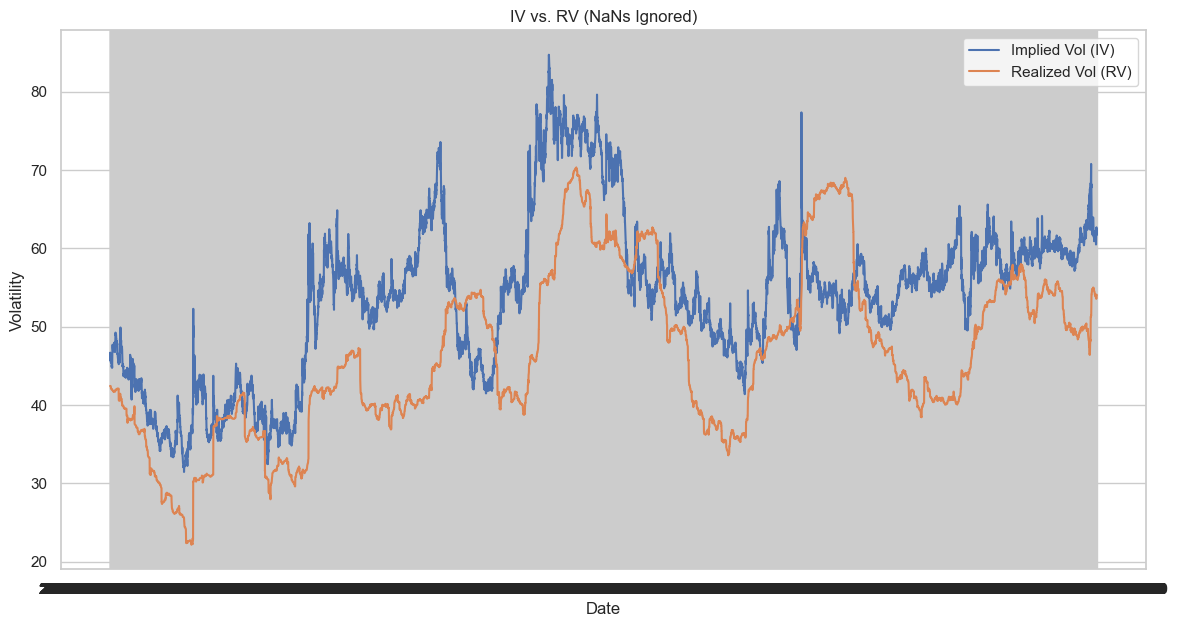

In [10]:
df_no_nan = df[['smoothed_IV', 'rolling_annual_vol_30']].dropna()

sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (14, 7), 'font.size': 12})

# Plot raw and smoothed IV on the same chart
plt.figure()

plt.plot(df_no_nan.index, df_no_nan['smoothed_IV'], label='Implied Vol (IV)', linestyle='-')
plt.plot(df_no_nan.index, df_no_nan['rolling_annual_vol_30'], label='Realized Vol (RV)', linestyle='-')

plt.title('IV vs. RV (NaNs Ignored)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
window_size = 720
df['rolling_mean_PI'] = df['min_max_PI'].rolling(window=window_size).mean()
df['rolling_std_PI'] = df['min_max_PI'].rolling(window=window_size).std()

df['z_score_PI'] = (df['min_max_PI'] - df['rolling_mean_PI']) / df['rolling_std_PI']
df

,close_price,log_return,smoothed_IV,raw_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,rolling_std_IV_30,rolling_mean_PI,rolling_std_PI,z_score_PI
Open time,,,,,,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,43.78,-0.000976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 18:00:00,27027.7,-0.000614,44.78,38.78,-0.000702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 19:00:00,26999.5,-0.001044,44.57,38.27,-0.000788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 20:00:00,27096.9,0.003601,44.66,47.36,-0.000785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-31 21:00:00,27081.9,-0.000554,44.88,51.48,-0.000848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23 12:00:00,101599.7,-0.003042,60.81,54.21,-0.001020,0.005758,53.887845,6.922155,0.005758,-0.000725,0.000375,-0.787580
2025-01-23 13:00:00,102472.9,0.008558,61.47,81.27,-0.000732,0.005724,53.572911,7.897089,0.005724,-0.000726,0.000375,-0.018109
2025-01-23 14:00:00,105167.7,0.025958,62.62,97.12,-0.000676,0.005782,54.115124,8.504876,0.005782,-0.000726,0.000374,0.133009


In [18]:
# Create lagged columns for Vol_Spread

max_k = 30

for k in range(1, max_k + 1):
    # 1) Vol Spread "lag k" => shift(k)
    #    So row t has the vol spread from t-k
    df[f'Vol_Spread_lag{k}'] = df['Vol_Spread'].shift(k)

    # 2) Forward k-day return => from day t to t+k (price[t+k]/price[t] - 1)
    #    So row t has the *future* return (t -> t+k).
    df[f'ForwardRet_{k}'] = df['close_price'].shift(-k) / df['close_price'] - 1


# Suppose we want to correlate all lagged Vol_Spread columns vs. all trailing CumRet columns
lag_cols = [f'Vol_Spread_lag{i}' for i in range(1, max_k + 1)]
ret_cols = [f'ForwardRet_{i}' for i in range(1, max_k + 1)]
df

,close_price,log_return,smoothed_IV,raw_IV,min_max_PI,rolling_std_30,rolling_annual_vol_30,Vol_Spread,rolling_std_IV_30,rolling_mean_PI,...,ForwardRet_21,ForwardRet_22,ForwardRet_23,ForwardRet_24,ForwardRet_25,ForwardRet_26,ForwardRet_27,ForwardRet_28,ForwardRet_29,ForwardRet_30
Open time,,,,,,,,,,,,,,,,,,,,,
2023-05-31 17:00:00,27044.3,0.004284,44.98,43.78,-0.000976,NaN,NaN,NaN,NaN,NaN,...,-0.005787,-0.005920,0.001353,-0.003565,-0.003099,-0.007125,-0.007170,-0.006023,-0.006463,-0.008837
2023-05-31 18:00:00,27027.7,-0.000614,44.78,38.78,-0.000702,NaN,NaN,NaN,NaN,NaN,...,-0.005309,0.001968,-0.002953,-0.002486,-0.006516,-0.006560,-0.005413,-0.005853,-0.008229,-0.009168
2023-05-31 19:00:00,26999.5,-0.001044,44.57,38.27,-0.000788,NaN,NaN,NaN,NaN,NaN,...,0.003015,-0.001911,-0.001444,-0.005478,-0.005522,-0.004374,-0.004815,-0.007193,-0.008133,-0.007178
2023-05-31 20:00:00,27096.9,0.003601,44.66,47.36,-0.000785,NaN,NaN,NaN,NaN,NaN,...,-0.005499,-0.005034,-0.009053,-0.009097,-0.007953,-0.008392,-0.010761,-0.011699,-0.010747,-0.005392
2023-05-31 21:00:00,27081.9,-0.000554,44.88,51.48,-0.000848,NaN,NaN,NaN,NaN,NaN,...,-0.004483,-0.008504,-0.008548,-0.007403,-0.007843,-0.010213,-0.011151,-0.010199,-0.004841,-0.003574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23 12:00:00,101599.7,-0.003042,60.81,54.21,-0.001020,0.005758,53.887845,6.922155,0.005758,-0.000725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-23 13:00:00,102472.9,0.008558,61.47,81.27,-0.000732,0.005724,53.572911,7.897089,0.005724,-0.000726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-23 14:00:00,105167.7,0.025958,62.62,97.12,-0.000676,0.005782,54.115124,8.504876,0.005782,-0.000726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


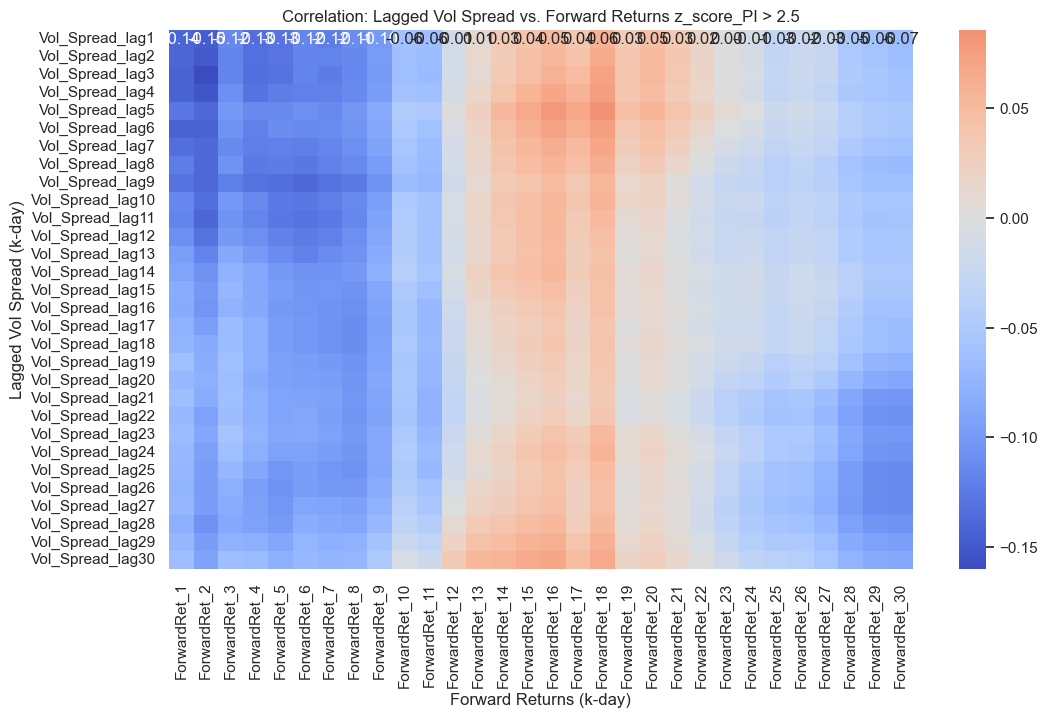

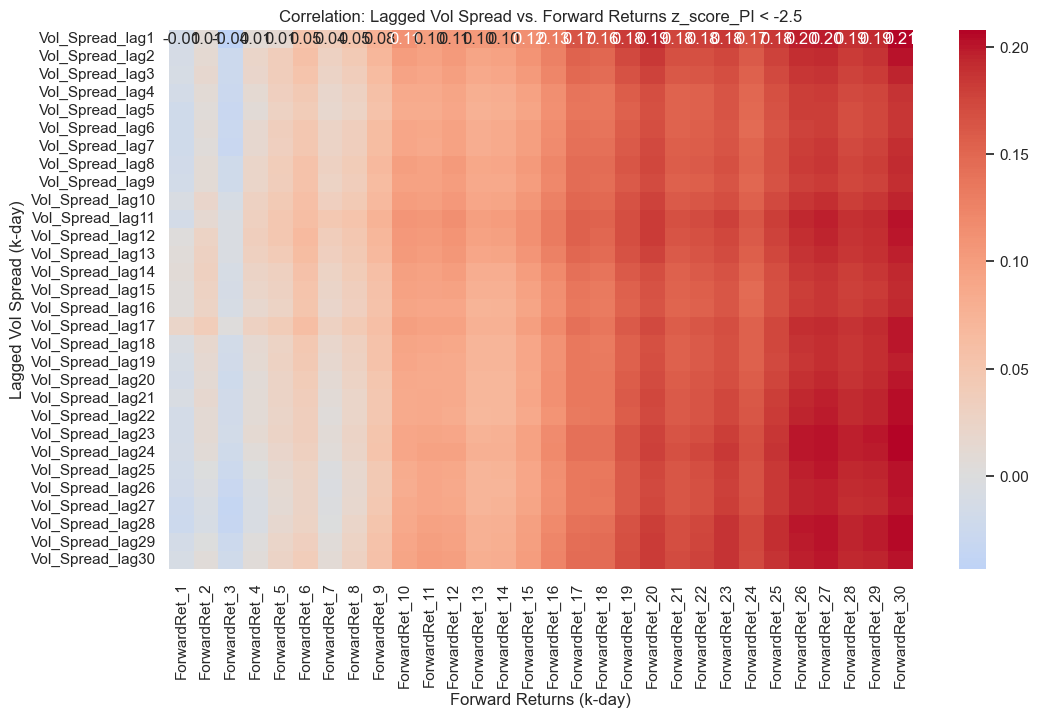

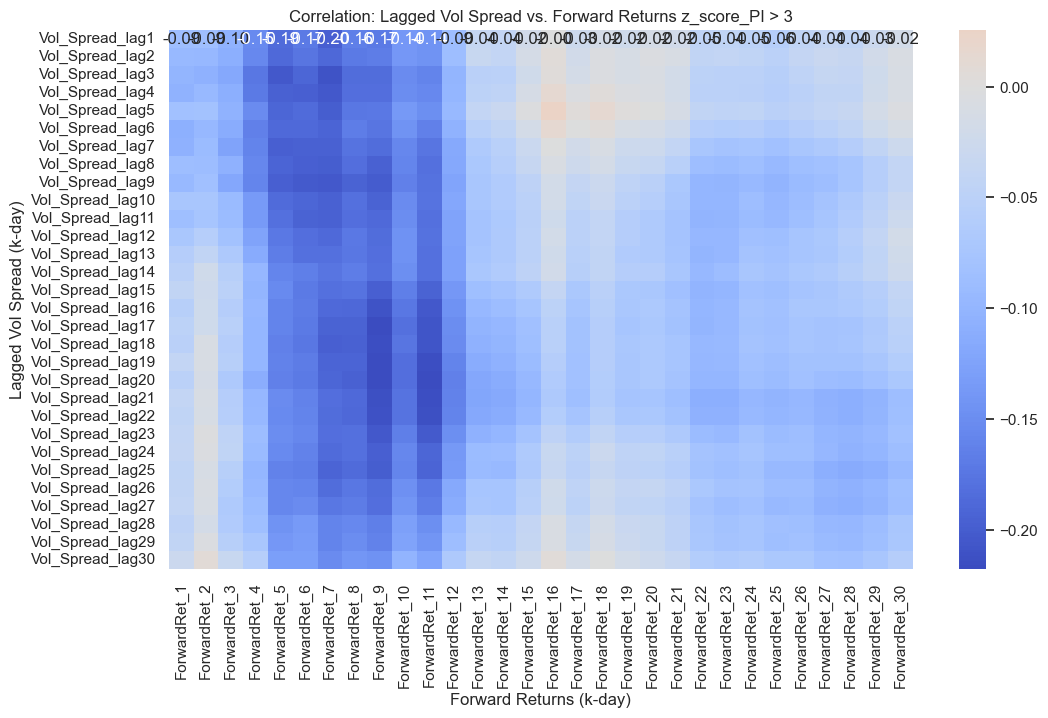

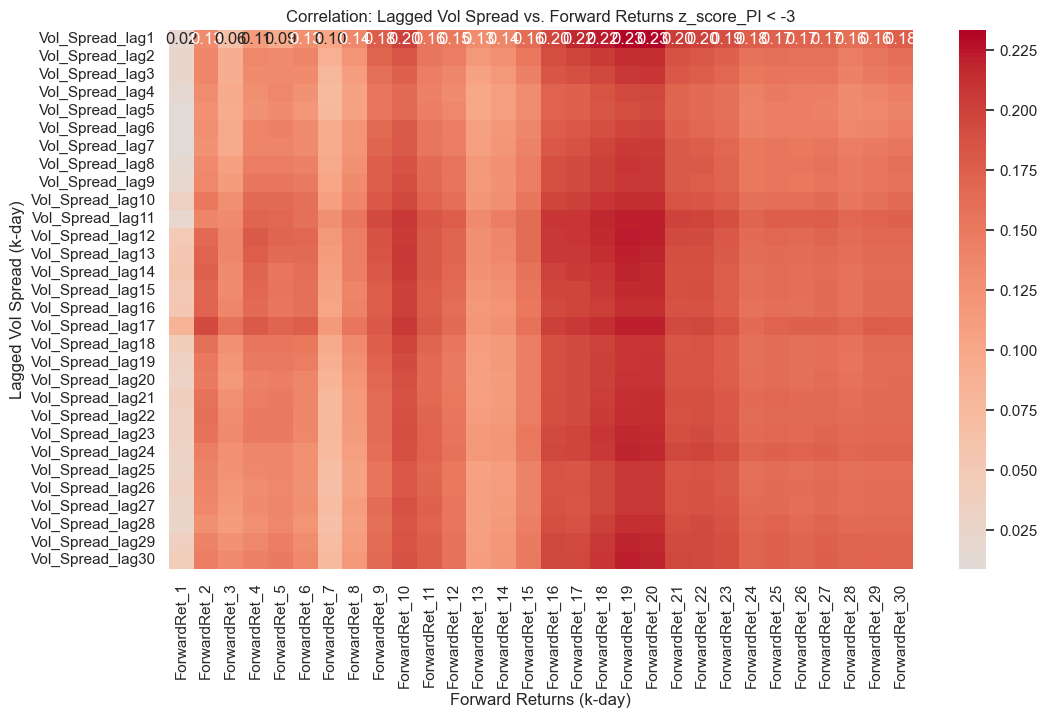

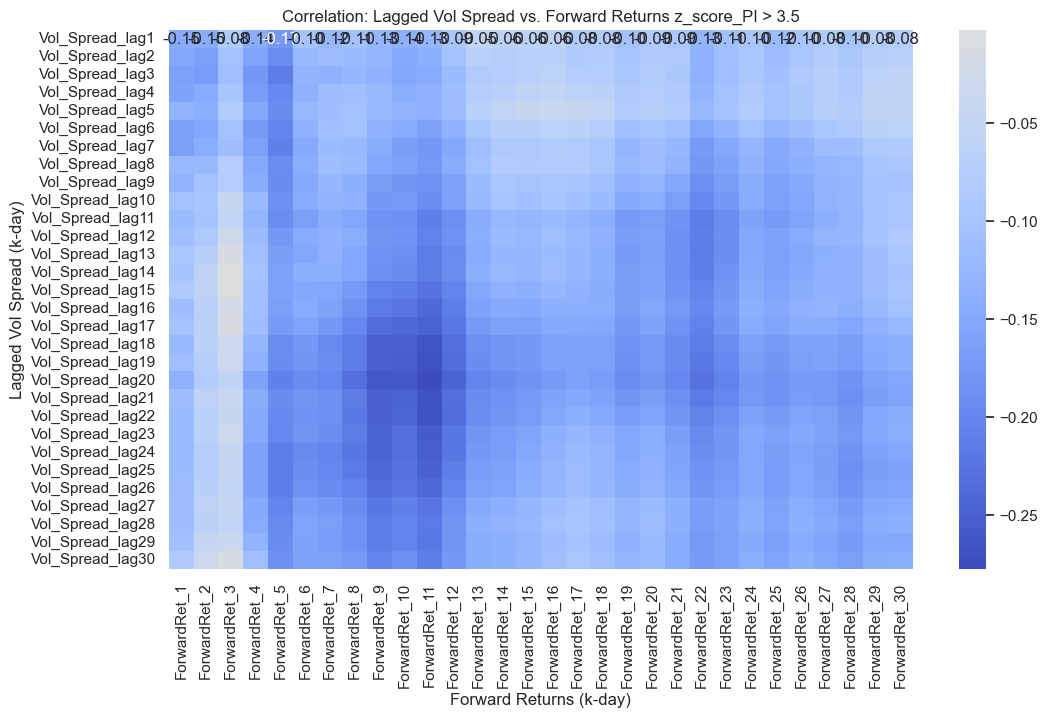

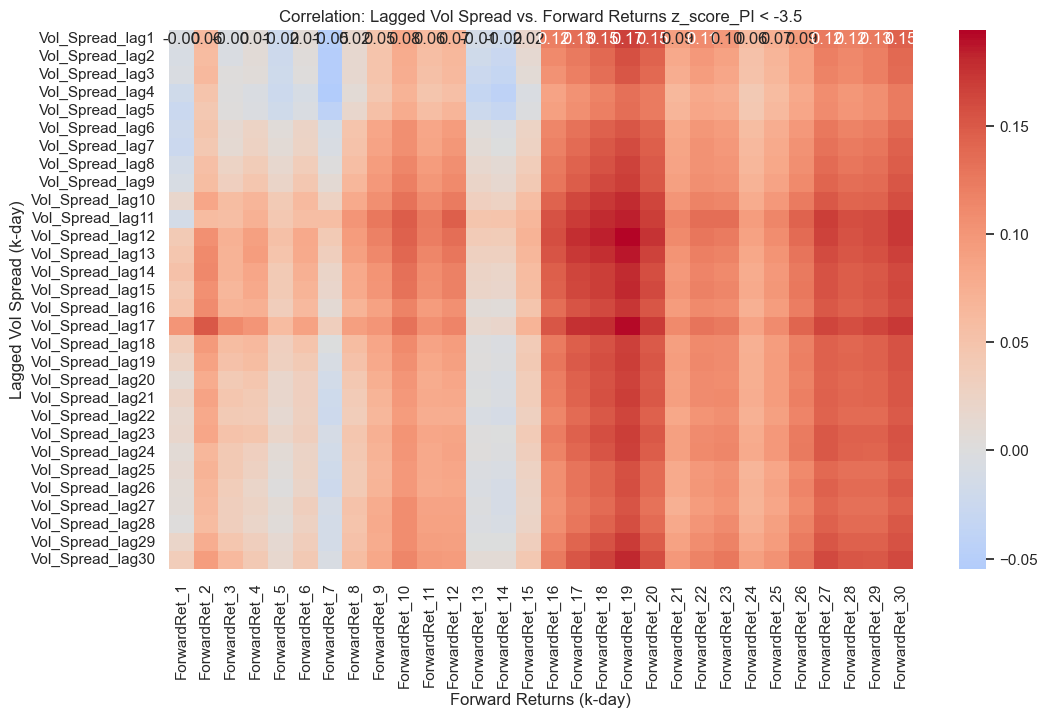

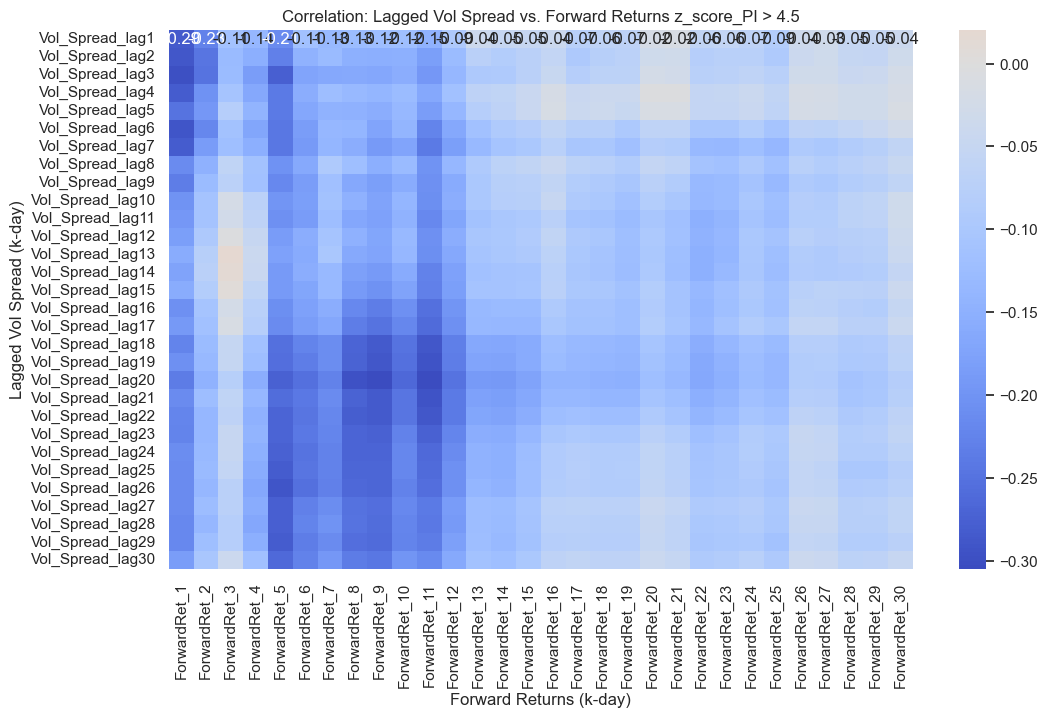

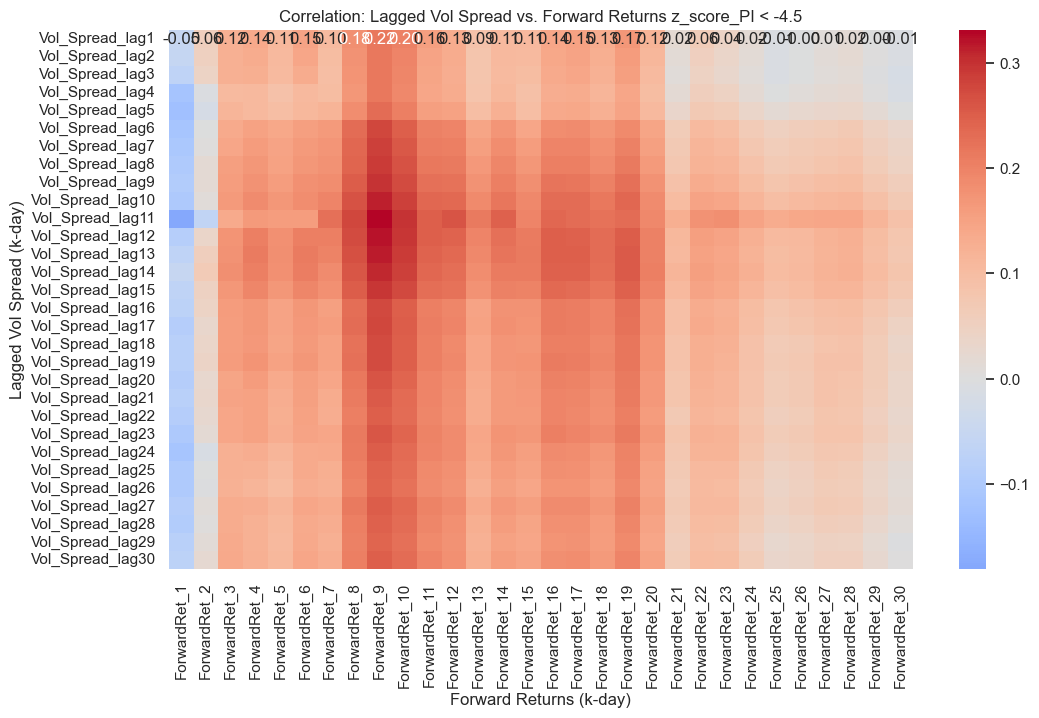

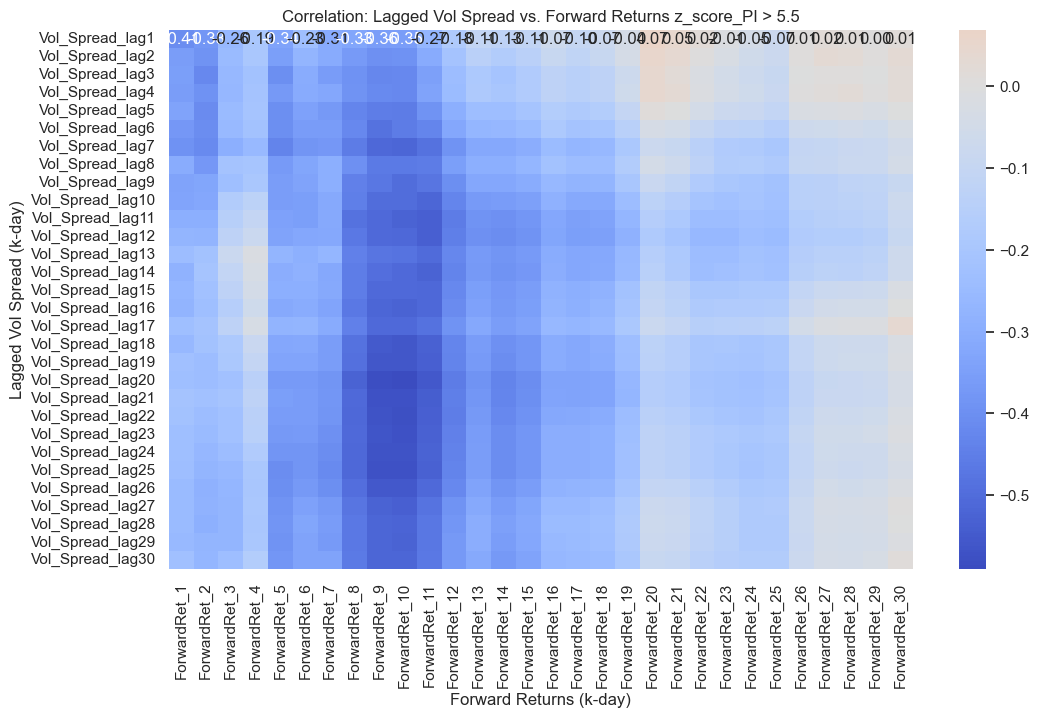

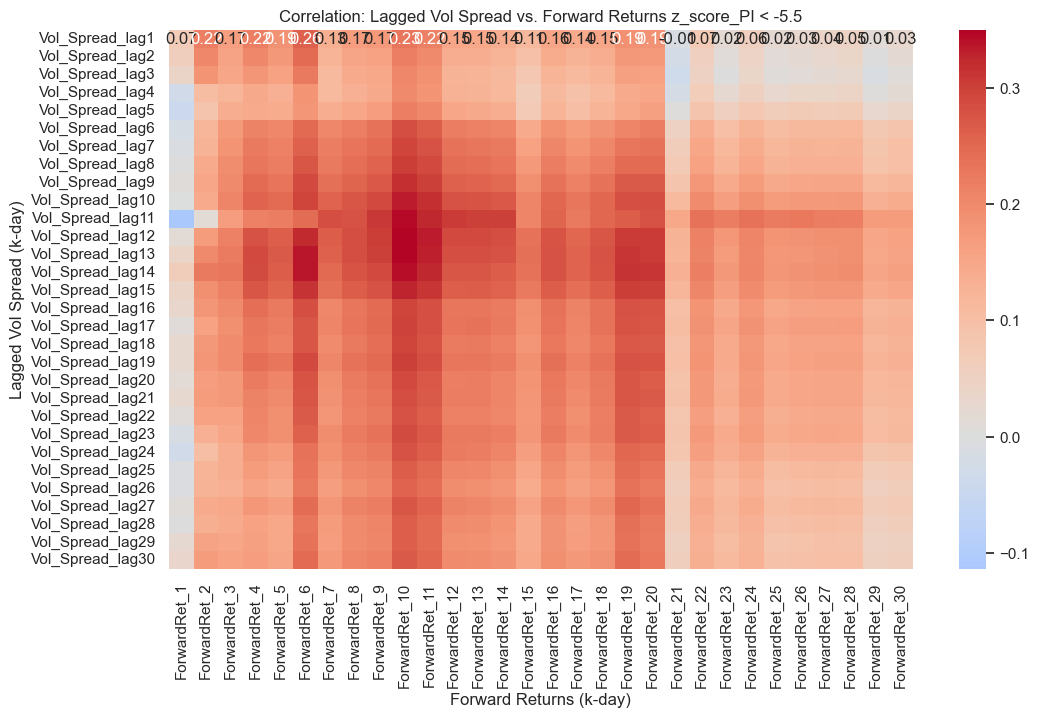

In [24]:
thresholds = [2.5, -2.5, 3, -3, 3.5, -3.5, 4.5, -4.5, 5.5, -5.5]


for thr in thresholds:
    # Determine condition
    if thr > 0:
        # Keep rows where z_score_PI > thr
        df_condition = df[df['z_score_PI'] > thr]
        cond_label = f"z_score_PI > {thr}"
    else:
        # Keep rows where z_score_PI < thr (thr is negative)
        df_condition = df[df['z_score_PI'] < thr]
        cond_label = f"z_score_PI < {thr}"

    # Subset columns & drop any rows with NaNs
    df_condition_subset = df_condition[lag_cols + ret_cols].dropna()
    # Compute cross-correlation between lagged vol spreads and cumulative returns
    corr_matrix = df_condition_subset.corr()
    cross_corr = corr_matrix.loc[lag_cols, ret_cols]

    plt.figure(figsize=(12,7))
    sns.heatmap(cross_corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title(f"Correlation: Lagged Vol Spread vs. Forward Returns {cond_label}")
    plt.xlabel("Forward Returns (k-day)")
    plt.ylabel("Lagged Vol Spread (k-day)")
    plt.show()



In [29]:
for thr in thresholds:
    if thr > 0:
        df_condition = df[df['z_score_PI'] > thr]
        cond_label = f"PI > {thr}"
    else:
        df_condition = df[df['z_score_PI'] < thr]
        cond_label = f"PI < {thr}"

    if df_condition.empty:
        # If no rows satisfy the condition, skip
        print(f"No rows found for {cond_label}, skipping...")
        continue

    # Compute correlation between 'PI' and 'Vol_Spread' in this subset
    corr_value = df_condition['z_score_PI'].corr(df_condition['Vol_Spread'])
     # Print or store the result
    print(f"{cond_label}: correlation = {corr_value:.3f}")
    results.append((cond_label, corr_value))


results = []
if results:
    labels = [item[0] for item in results]
    corr_vals = [item[1] for item in results]

    plt.figure(figsize=(8, 4))
    plt.bar(labels, corr_vals, color='skyblue')
    plt.axhline(y=0, color='black', linewidth=1)
    plt.title("Correlation of PI vs. Vol_Spread by Threshold Condition")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


PI > 2.5: correlation = 0.102
PI < -2.5: correlation = 0.164
PI > 3: correlation = 0.135
PI < -3: correlation = 0.070
PI > 3.5: correlation = 0.182
PI < -3.5: correlation = -0.038
PI > 4.5: correlation = 0.162
PI < -4.5: correlation = 0.000
PI > 5.5: correlation = 0.186
PI < -5.5: correlation = 0.125
